In [1]:
import random
import numpy as np
from elevator import Elevator
from passenger import Passenger
from building import Building

def main(num_passengers, num_floors, strategy):
    #num_passengers = int(input("How many passengers does the building have?"))
    #num_floors = int(input("How many floors does the building have?"))
    #strategy = int(input("Which strategy do you want to use? (1 for FIFO, 2 for move-to-max-min)"))
    building = Building(num_passengers, num_floors)
    elevator = Elevator(num_floors)
    passengers = []
    for i in range(num_passengers):
        start_floor = random.choice(range(elevator.n_floors))
        destination_floor = random.choice(range(elevator.n_floors))
        while start_floor == destination_floor:
            destination_floor = random.choice(range(elevator.n_floors))
        passenger = Passenger(start_floor, destination_floor)
        passengers.append(passenger)
        elevator.add_call(passenger.start_floor, passenger.destination, passenger)
    if strategy == 1:
        for passenger in passengers:
            elevator.FIFO()
    else:
        elevator.max_floor_strategy()
    costs = []
    for passenger in passengers:
        costs.append(passenger.time_cost)

    return costs

In [2]:
mean_1 = []
mean_2 = []
mean_sq_1 = []
mean_sq_2 = []
median_1 = []
median_2 = []
max_1 = []
max_2 = []

for n_passengers in [10, 25, 50, 100, 250]: ## simulates with diff numbers of passengers
    
    mean_costs_1 = []
    mean_sq_costs_1 = []
    median_costs_1 = []
    max_costs_1 = []
    mean_costs_2 = []
    mean_sq_costs_2 = []
    median_costs_2 = []
    max_costs_2 = []
    
    for j in range(10): ## to control for outliers
        costs_1 = main(n_passengers, 15, 1)
        costs_2 = main(n_passengers, 15, 2)
        mean_cost_1 = np.mean(costs_1)
        mean_sq_cost_1 = np.mean([k**2 for k in costs_1])
        median_cost_1 = np.median(costs_1)
        max_cost_1 = max(costs_1)
        mean_cost_2 = np.mean(costs_2)
        mean_sq_cost_2 = np.mean([k**2 for k in costs_2])
        median_cost_2 = np.median(costs_2)
        max_cost_2 = max(costs_2)
        
        mean_costs_1.append(mean_cost_1)
        mean_sq_costs_1.append(mean_sq_cost_1)
        median_costs_1.append(median_cost_1)
        max_costs_1.append(max_cost_1)
        mean_costs_2.append(mean_cost_2)
        mean_sq_costs_2.append(mean_sq_cost_2)
        median_costs_2.append(median_cost_2)
        max_costs_2.append(max_cost_2)
        
    mean_1.append(np.mean(mean_costs_1)) ## gets means of the 10 runs
    mean_2.append(np.mean(mean_costs_2))
    mean_sq_1.append(np.mean(mean_sq_costs_1))
    mean_sq_2.append(np.mean(mean_sq_costs_2))
    median_1.append(np.mean(median_costs_1))
    median_2.append(np.mean(median_costs_2))
    max_1.append(np.mean(max_costs_1))
    max_2.append(np.mean(max_costs_2))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

num_passengers = [10, 25, 50, 100, 250]

/Users/ben-imadali/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:3356: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


AttributeError: 'list' object has no attribute 'get_label'

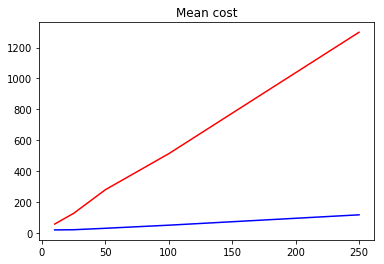

In [4]:
## Mean cost

fifo_1 = plt.plot(num_passengers, mean_1, 'r', label="FIFO", hold=True)
mtmm_1 = plt.plot(num_passengers, mean_2, 'b', label="MTMM", hold=True)
plt.title("Mean cost")
plt.legend(handles=[fifo_1,mtmm_1])
plt.xlabel("Num Passengers")
plt.ylabel("Cost")

In [13]:
## Mean squared cost

fifo_2 = plt.plot(num_passengers, mean_sq_1, 'r', label="FIFO")
mtmm_2 = plt.plot(num_passengers, mean_sq_2, 'b', label="MTMM")
plt.title("Mean squared cost")
plt.legend(handles=[fifo_2,mtmm_2])
plt.xlabel("Num Passengers")
plt.ylabel("Cost")

AttributeError: 'module' object has no attribute 'popall'

In [14]:
## Median cost

fifo_3, = plt.plot(num_passengers, median_1, 'r', label="FIFO")
mtmm_3, = plt.plot(num_passengers, median_2, 'b', label="MTMM")
plt.title("Median cost")
plt.legend(handles=[fifo_3,mtmm_3])
plt.xlabel("Num Passengers")
plt.ylabel("Cost")

AttributeError: 'module' object has no attribute 'popall'

In [15]:
## Max cost

fifo_4, = plt.plot(num_passengers, max_1, 'r', label="FIFO")
mtmm_4, = plt.plot(num_passengers, max_2, 'b', label="MTMM")
plt.title("Maximum cost")
plt.legend(handles=[fifo_4,mtmm_4])
plt.xlabel("Num Passengers")
plt.ylabel("Cost")

AttributeError: 'module' object has no attribute 'popall'